A Survey on Technology Choice
======


### Hypothesis

My response variable is the number of watchers on GitHub. We are examining the variables that we have available and choosing the variables that might work the best for our model. Since we are predicting the number of watchers on GitHub for a package we need to choose a variable that might affect the response to the number of viewers. I think the number of watchers is going to be affected by ratings that users have given the package. The ratings are seen in PG4Dtr0_6, PG4Psv7_8 and PG4Prm9_10.

In [19]:
# For nicer printing
options(digits=2);

In [20]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);

#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}

In [23]:
#now explore variables
summary(data);

     Device    Completed       Start               End               PG0Dis   
        :  2   0    :  2   Min.   :1.54e+09   Min.   :1.54e+09   Min.   :  0  
 Bot    :  1   FALSE:546   1st Qu.:1.54e+09   1st Qu.:1.54e+09   1st Qu.:  0  
 PC     :955   TRUE :805   Median :1.54e+09   Median :1.54e+09   Median :  1  
 Phone  :376               Mean   :1.54e+09   Mean   :1.54e+09   Mean   : 44  
 Tablet : 16               3rd Qu.:1.54e+09   3rd Qu.:1.54e+09   3rd Qu.: 24  
 Unknown:  3               Max.   :1.54e+09   Max.   :1.54e+09   Max.   :168  
                           NA's   :2          NA's   :548        NA's   :73   
    PG0Shown      PG0Submit    
 Min.   :   0   Min.   :    2  
 1st Qu.:   0   1st Qu.:    6  
 Median : 102   Median :    9  
 Mean   : 249   Mean   :  299  
 3rd Qu.: 428   3rd Qu.:   15  
 Max.   :1190   Max.   :76226  
 NA's   :73     NA's   :199    
                                       PG1PsnUse  
 For personal work and/or research use      :727  
          

In [24]:
library(dplyr)
library(tidyr)
library(caret)
#library(randomForest)

In [25]:
data_complete = filter(data, Completed == TRUE)

#number of rows removed
print(nrow(data))
print(nrow(data_complete))

[1] 1353
[1] 805


### Question 1: Time to take the survey

In [28]:
survey_time = data_complete$End - data_complete$Start
print("Survey Time (s):")
print(paste0("Max: ", max(survey_time)))
print(paste0("Min: ", min(survey_time)))
print(paste0("Average: ", round(mean(survey_time))))
print(paste0("Median: ", median(survey_time)))

[1] "Survey Time (s):"
[1] "Max: 87551"
[1] "Min: 51"
[1] "Average: 680"
[1] "Median: 225"


The average time to take the survey was 680 seconds with the max time being 87551 seconds and the min being 51 seconds. The max is definately an outlier and looks like some one left for a while before returning to finish the survey consider the max is almost a full day and this is backed up by the median time being almost a third of the average time.

### Question 2 and 3: Longest and Least Amount of Time

In [29]:
completion_time = select(data_complete, contains('Submit')) %>%
    na.omit()
print(summary(completion_time))

avg_completion_time = colMeans(completion_time)
med_completion_time = apply(completion_time, 2, FUN = median)
print("Average completion time for each question:")
print(avg_completion_time)
print("Median Completion Time for each question:")
print(med_completion_time)

   PG0Submit       PG1Submit      PG2Submit      PG3Submit      PG4Submit  
 Min.   :    2   Min.   :   1   Min.   :   1   Min.   :   1   Min.   :  1  
 1st Qu.:    6   1st Qu.:  11   1st Qu.:   9   1st Qu.:  16   1st Qu.:  6  
 Median :   10   Median :  16   Median :  13   Median :  24   Median :  7  
 Mean   :  242   Mean   :  42   Mean   :  31   Mean   :  42   Mean   :  9  
 3rd Qu.:   15   3rd Qu.:  31   3rd Qu.:  31   3rd Qu.:  41   3rd Qu.:  9  
 Max.   :66474   Max.   :6892   Max.   :1470   Max.   :4648   Max.   :332  
   PG5Submit      PG6Submit      PG7Submit     PG8Submit     PG9Submit    
 Min.   :   3   Min.   :   1   Min.   :  1   Min.   :  1   Min.   :    0  
 1st Qu.:  45   1st Qu.:   7   1st Qu.:  6   1st Qu.:  5   1st Qu.:    7  
 Median :  62   Median :   9   Median :  8   Median :  8   Median :   10  
 Mean   :  85   Mean   :  25   Mean   : 11   Mean   : 12   Mean   :   40  
 3rd Qu.:  84   3rd Qu.:  12   3rd Qu.: 11   3rd Qu.: 14   3rd Qu.:   14  
 Max.   :4130   Ma

With average times PG0Submit takes the longest at 241.5 seconds and PG11Submit takes the least with 6.4 second. We know there is a large outlier of almost a full day to answer so maybe that time was spent on PG0Submit. I say this because with the median the longest was 62 second and PG5Submit while PG0Submit was only 10 seconds. PG11Submit was only 4 seconds which was the least for both average and mean.

### Question 4: Top-ranked criteria

In [30]:
criteria_resp = select(data_complete, starts_with('PG5'), -ends_with('Time'), -ends_with('Order'), -ends_with('Submit'))
print(summary(criteria_resp))

           PG5_1RRPQ             PG5_2BNUI              PG5_3HDS  
                :335                  :381                  :225  
 Essential      : 59   Essential      :  3   Essential      :103  
 High Priority  :102   High Priority  : 25   High Priority  :199  
 Low Priority   : 85   Low Priority   :120   Low Priority   : 68  
 Medium Priority:130   Medium Priority: 91   Medium Priority:161  
 Not a Priority : 94   Not a Priority :185   Not a Priority : 49  
            PG5_4VGP              PG5_5PHR             PG5_6SSYOP 
                :311                  :213                  :310  
 Essential      : 22   Essential      : 79   Essential      : 61  
 High Priority  :109   High Priority  :247   High Priority  :136  
 Low Priority   : 87   Low Priority   : 63   Low Priority   : 83  
 Medium Priority:162   Medium Priority:160   Medium Priority:109  
 Not a Priority :114   Not a Priority : 43   Not a Priority :106  
           PG5_7NDYP              PG5_8CP               PG5_9F

We see the PG5_8CP has the highest essential value of 228 which is computing performance so it is the top ranked criteria.

### Question 5: Demographic distribution by age

    18 - 24     25 - 34     35 - 44     45 - 54     55 - 64 65 and over 
         34         338         258          89          36           8 


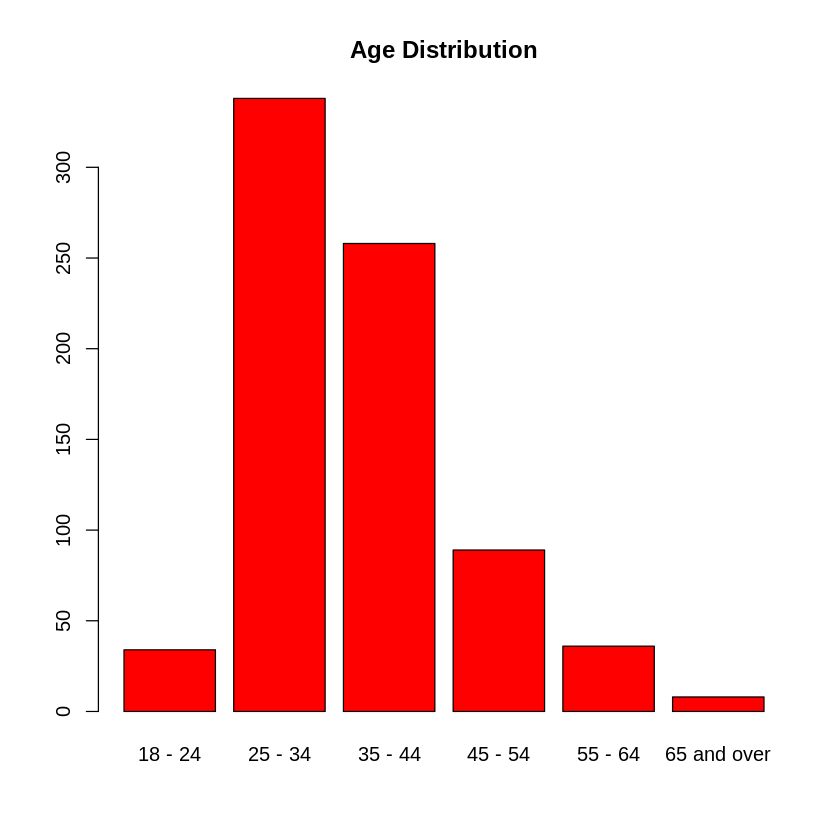

In [31]:
age = select(data_complete, PG12Resp) %>%
    filter(PG12Resp != '')
age1 = factor(age[,])

print(summary(age1))
barplot(table(age1), main = 'Age Distribution', col ='red')

### Interpret  basic summaries

In [34]:
#get numeric fields only for correlation
sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks

,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1Submit,PG2Submit,PG3Submit,PG4Dtr0_6,PG4Psv7_8,...,PG5_12Order,PG5_13Order,PG5Submit,PG6Submit,PG7Submit,PG8Submit,PG9Submit,PG10Submit,PG11Submit,PG12Submit
Start,1.0000,0.9952,-0.0417,-0.11507,0.1350,0.1156,0.0791,0.0384,0.01210,0.00371,...,-0.0369,0.0598,0.08512,0.0054,0.0776,0.0441,0.04101,0.047,7.9e-02,0.0746
End,0.9952,1.0000,-0.0415,-0.09879,0.1142,0.1550,0.0791,0.0511,-0.05185,-0.04576,...,-0.0359,0.0661,0.09088,0.0051,0.0759,0.0435,0.04071,0.052,7.9e-02,0.0772
PG0Dis,-0.0417,-0.0415,1.0000,0.87220,0.0153,0.0065,0.0041,0.0567,0.16368,0.02668,...,0.0151,0.0384,0.00601,0.0277,0.0097,0.0354,0.00995,-0.029,-4.5e-02,0.0546
PG0Shown,-0.1151,-0.0988,0.8722,1.00000,0.0360,0.0205,0.0023,0.0497,0.08226,0.00036,...,0.0074,0.0407,-0.00888,0.0401,0.0121,0.0264,0.00056,-0.045,-7.1e-02,0.0436
PG0Submit,0.1350,0.1142,0.0153,0.03596,1.0000,0.1088,0.1037,0.1273,-0.00802,-0.03763,...,-0.0161,-0.0280,0.17671,0.1518,0.1365,0.1258,0.17579,0.225,1.1e-01,0.1096
PG1Submit,0.1156,0.1550,0.0065,0.02047,0.1088,1.0000,0.1452,0.2688,-0.06852,0.05661,...,0.0512,-0.0651,0.24670,0.2414,0.1133,0.1069,0.10895,0.170,7.4e-02,0.1137
PG2Submit,0.0791,0.0791,0.0041,0.00235,0.1037,0.1452,1.0000,0.2045,0.00146,0.00897,...,0.0210,-0.0047,0.21851,0.2696,0.1245,0.1567,0.20127,0.099,1.1e-01,0.1073
PG3Submit,0.0384,0.0511,0.0567,0.04968,0.1273,0.2688,0.2045,1.0000,0.00865,0.04424,...,0.0464,-0.0222,0.26048,0.2706,0.1316,0.1822,0.27450,0.161,1.4e-01,0.1642
PG4Dtr0_6,0.0121,-0.0518,0.1637,0.08226,-0.0080,-0.0685,0.0015,0.0087,1.00000,NA,...,0.1774,-0.1289,-0.05214,-0.1618,0.1560,0.0695,-0.07292,0.044,8.4e-04,-0.0272
PG4Psv7_8,0.0037,-0.0458,0.0267,0.00036,-0.0376,0.0566,0.0090,0.0442,NA,1.00000,...,-0.0008,-0.0218,0.08974,-0.0146,-0.0363,0.0526,0.05977,0.069,-4.9e-02,-0.0217


Interpret correlations: onlys start vs End, calculate differene instead


### Simple questions - Answered above

- Time to take entire survey?
- Question that took the longest to complete?
- Question that took the least time?
- Top-ranked criteria?
- Demographic distribution by age?

### Correlation Analysis

The correlation matrix above tells us about relationships between potential input varaiables. It doesn't look like many variables are correlated since most values are below .15. PG0Dis and PG0Shown have a correlation of .87 which is high compared to the rest in our matrix. The variables both correspond to the time users were displayed questions and the number of participants shown so it is understandable why they are correlated. 

### Hypothesis
My response variable is the number of watchers on GitHub. We are examining the variables that we have available and choosing the variables that might work the best for our model. Since we are predicting the number of watchers on GitHub for a package we need to choose a variable that might affect the response to the number of viewers. I think the number of watchers is going to be affected by ratings that users have given the package. The ratings are seen in PG4Dtr0_6, PG4Psv7_8 and PG4Prm9_10.

### Clean Data

In [35]:
clean <- data[data$PG5_12NWG != "",]
clean = clean[, c("PG1PsnUse", "PG1WdAuth", "PG1Trn", "PG1Other", "PG2Resp", "PG4Dtr0_6", "PG4Psv7_8", "PG4Prm9_10", "PG4AllResp", "PG5_8CP", "PG6Resp", "PG8Resp", "PG9Resp", "PG10Resp", "PG11Resp", "PG12Resp", "PG7R" , "PG7Python")]

for(i in 1:dim(data)[2]) if (is.factor(data[,i])) data[,i] = as.numeric(data[,i]);
for(i in 1:ncol(data)) {
    data[is.na(data[,i]),i] = 0
}

model <-glm(PG5_12NWG ~ ., data = data)
summary(model)


Call:
glm(formula = PG5_12NWG ~ ., data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1402  -0.0627  -0.0027   0.0754   3.1301  

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.54e+01   5.94e+01   -0.43  0.66862    
Device        -1.16e-02   2.73e-02   -0.42  0.67211    
Completed      2.55e+01   5.94e+01    0.43  0.66750    
Start         -1.66e-08   3.86e-08   -0.43  0.66789    
End           -1.65e-08   3.86e-08   -0.43  0.66886    
PG0Dis        -1.97e-04   2.71e-04   -0.73  0.46753    
PG0Shown       2.16e-05   6.09e-05    0.35  0.72334    
PG0Submit     -4.35e-06   3.93e-06   -1.11  0.26866    
PG1PsnUse     -5.53e-03   1.22e-02   -0.45  0.65113    
PG1WdAuth     -1.50e-02   1.94e-02   -0.77  0.44103    
PG1Trn        -3.85e-02   4.38e-02   -0.88  0.37965    
PG1Other      -2.30e-03   1.86e-03   -1.24  0.21704    
PG1Submit     -3.92e-05   5.86e-05   -0.67  0.50422  

In [40]:
v <- varImp(model, scale=FALSE)
v <- v[v$Overall > 2.0,, drop=FALSE]
v

,Overall
PG5_2Order,2.4
PG5_4VGP,2.9
PG5_4Order,2.6
PG5_5Order,3.8
PG5_7NDYP,5.6
PG5_7Time,4.2
PG5_8Order,2.5
PG5_9FRP,2.4
PG5_11NSG,8.9
PG5_11Time,7.3


### Conclusion

I used caret to tell how important each variable is in predicting the outcome. We can see that PG5_12Time and PG5_NFG are the most important with our model so they are our best predictors. I wanted to use PG4Dtr0_6, PG4Psv7_8 and PG4Prm9_10 to predict the outcome but it ended up not being the best.